In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import pandas as pd

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
expts = ['01deg_jra55v13_ryf9091','01deg_jra55_SAMextr_1011_from9091_kial',
        '01deg_jra55_SAMextr_9899_from9091','01deg_jra55_SAMextr_0203_from9091',
        '01deg_jra55_SAMextr_9192_from9091']
session = cc.database.create_session()

In [3]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.4:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
# client=Client('tcp://10.0.64.22:8786', local_dir='/local/g40/amh157')
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:38021 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [6]:
def global_scalar(variable, session, expts):
    
    for expt in expts:
        darray = cc.querying.getvar(expt, variable, session)
        annual_average = darray.resample(time='A').mean()
        annual_average.plot(label=expt)
    
    
    plt.title(variable)

    plt.gca().autoscale()

CPU times: user 41.7 s, sys: 2.49 s, total: 44.2 s
Wall time: 1min 31s


Text(0,0.5,'KE ($m^2/s^2$)')

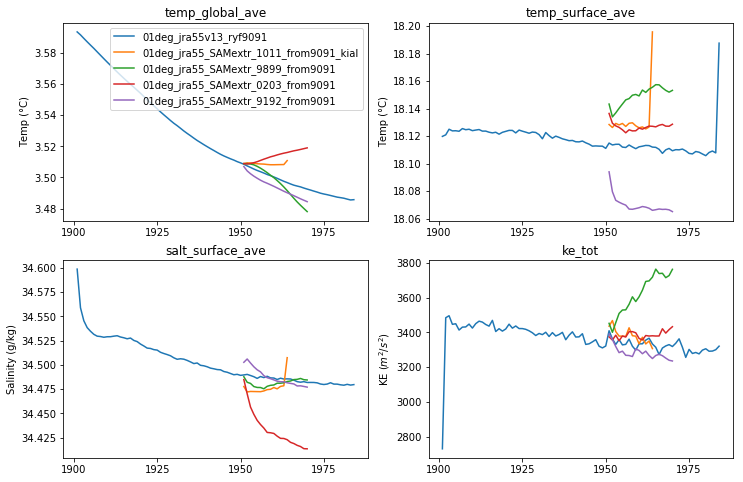

In [7]:
%%time
plt.figure(figsize=(12,8))

#############
## FIRST PLOT
ax = plt.subplot(221)
global_scalar('temp_global_ave', session, expts)
plt.legend()
plt.xlabel('')
plt.ylabel('Temp (°C)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

##############
## SECOND PLOT
ax = plt.subplot(222)
global_scalar('temp_surface_ave', session, expts)
plt.xlabel('')
plt.ylabel('Temp (°C)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
## THIRD PLOT
ax = plt.subplot(223)
global_scalar('salt_surface_ave', session, expts)
plt.xlabel('')
plt.ylabel('Salinity (g/kg)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])

#############
##FOURTH PLOT
ax = plt.subplot(224)
global_scalar('ke_tot', session, expts)
plt.xlabel('')
plt.ylabel('KE ($m^2/s^2$)')
#ax.set_xlim([pd.datetime(1900,1,1),pd.datetime(1919,12,31)])